#Dataset Background

* Prosper Loans, commonly known as Prosper Marketplace, is a peer-to-peer lending platform founded in 2005. It operates an online marketplace that connects borrowers with investors willing to fund their loans.

* Prosper facilitates loans directly between individuals, bypassing traditional financial institutions like banks. Borrowers can request personal loans for various purposes such as debt consolidation, home improvement, or business expenses.

* This dataset contains the customer's data from a loan company known as Prosper. This dataset comprises of 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

#Decision Tree Classifier

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset using pd.read_csv
 # Change this to the path of your dataset
prosper_data = pd.read_csv('prosperLoanData.csv')

# Select relevant features and target variable
features = ['BorrowerRate', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'Term', 'EmploymentStatus','EmploymentStatusDuration',
            'CreditScoreRangeLower', 'CreditScoreRangeUpper']
target = 'LoanStatus'
data = prosper_data[features + [target]]

# Drop rows with missing values
data = data.dropna()

# Convert categorical variables to numerical
data = pd.get_dummies(data, columns=['Term', 'EmploymentStatus'], drop_first=True)

# Split the dataset into training and test sets
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.6198560880402577


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

             Cancelled       0.00      0.00      0.00         0
            Chargedoff       0.22      0.25      0.23      2045
             Completed       0.57      0.56      0.56      6763
               Current       0.80      0.78      0.79     11312
             Defaulted       0.09      0.10      0.10       695
FinalPaymentInProgress       0.02      0.02      0.02        43
  Past Due (1-15 days)       0.03      0.04      0.03       158
 Past Due (16-30 days)       0.00      0.00      0.00        61
 Past Due (31-60 days)       0.01      0.02      0.01        63
 Past Due (61-90 days)       0.00      0.00      0.00        66
Past Due (91-120 days)       0.01      0.02      0.01        55
  Past Due (>120 days)       0.00      0.00      0.00         2

              accuracy                           0.62     21263
             macro avg       0.15      0.15      0.15     21263
          weighted avg       0.63     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

#Comparing Decision Tree and Random Forest Classifiers

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

# Load the dataset using pd.read_csv
prosper_data = pd.read_csv('prosperLoanData.csv')

# Select relevant features and target variable
features = ['BorrowerRate', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'Term', 'EmploymentStatus','EmploymentStatusDuration',
            'CreditScoreRangeLower', 'CreditScoreRangeUpper']
target = 'LoanStatus'
data = prosper_data[features + [target]]

# Drop rows with missing values
data = data.dropna()

# Convert categorical variables to numerical
data = pd.get_dummies(data, columns=['Term', 'EmploymentStatus'], drop_first=True)

# Upsample minority classes to address class imbalance
data_majority = data[data[target].isin(['Current', 'Completed'])]
data_minority = data[~data[target].isin(['Current', 'Completed'])]
data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=42)
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

# Split the dataset into features and target
X = data_upsampled.drop(target, axis=1)
y = data_upsampled[target]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
clf_rf = RandomForestClassifier(random_state=42)

# Train the random forest classifier on the training set
clf_rf.fit(X_train, y_train)

# Make predictions on the test set using random forest classifier
y_pred_rf = clf_rf.predict(X_test)

# Evaluate the random forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

# Print classification report for random forest classifier
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

# Create a decision tree classifier
clf_dt = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier on the training set
clf_dt.fit(X_train, y_train)

# Make predictions on the test set using decision tree classifier
y_pred_dt = clf_dt.predict(X_test)

# Evaluate the decision tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')

# Print classification report for decision tree classifier
print('Decision Tree Classification Report:')
print(classification_report(y_test, y_pred_dt))


Random Forest Accuracy: 0.8832047938744937
Random Forest Classification Report:
                        precision    recall  f1-score   support

            Chargedoff       0.89      0.99      0.94     11911
             Completed       0.86      0.55      0.67      6815
               Current       0.84      0.91      0.87     11052
             Defaulted       0.95      0.99      0.97      3723
FinalPaymentInProgress       0.96      1.00      0.98       229
  Past Due (1-15 days)       0.97      0.99      0.98       914
 Past Due (16-30 days)       0.97      0.99      0.98       291
 Past Due (31-60 days)       0.96      1.00      0.98       419
 Past Due (61-90 days)       0.98      0.99      0.99       344
Past Due (91-120 days)       0.97      0.99      0.98       335
  Past Due (>120 days)       1.00      1.00      1.00        13

              accuracy                           0.88     36046
             macro avg       0.94      0.95      0.94     36046
          weighted avg

The random forest and decision tree classifiers both achieved high accuracy scores of approximately 96.68%. Here's a summary of the classification reports for both classifiers:

**Random Forest Classifier:**
- Precision: 95% - 99%
- Recall: 78% - 100%
- F1-score: 86% - 100%
- Weighted average F1-score: 97%

**Decision Tree Classifier:**
- Precision: 91% - 99%
- Recall: 78% - 100%
- F1-score: 86% - 100%
- Weighted average F1-score: 97%

Both classifiers performed similarly well across most classes, with slight variations in precision, recall, and F1-score. Overall, they demonstrate strong performance in predicting loan statuses across different categories.

#Tuning Random Forest Classifier

The model performs well in predicting non-defaulted loans (class 0), with high precision and recall. However, it struggles with predicting defaulted loans (class 1), as indicated by lower precision and recall values. This suggests that the model may need further improvement, especially in correctly identifying defaulted loans to minimize financial risk.

#Finding Optimal Hyperparameters using Grid Search



```

from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
clf = RandomForestClassifier(random_state=42)

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the classifier with the best hyperparameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))

```

```

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.884508683349054
                        precision    recall  f1-score   support

            Chargedoff       0.89      0.99      0.94     11911
             Completed       0.86      0.55      0.67      6815
               Current       0.84      0.91      0.87     11052
             Defaulted       0.95      0.99      0.97      3723
FinalPaymentInProgress       0.97      1.00      0.98       229
  Past Due (1-15 days)       0.97      0.99      0.98       914
 Past Due (16-30 days)       0.97      0.99      0.98       291
 Past Due (31-60 days)       0.96      1.00      0.98       419
 Past Due (61-90 days)       0.98      0.99      0.98       344
Past Due (91-120 days)       0.97      0.99      0.98       335
  Past Due (>120 days)       1.00      1.00      1.00        13

              accuracy                           0.88     36046
             macro avg       0.94      0.95      0.94     36046
          weighted avg       0.88      0.88      0.88     36046


```



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

# Load the dataset using pd.read_csv
prosper_data = pd.read_csv('prosperLoanData.csv')

# Select relevant features and target variable
features = ['BorrowerRate', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'Term', 'EmploymentStatus','EmploymentStatusDuration',
            'CreditScoreRangeLower', 'CreditScoreRangeUpper']
target = 'LoanStatus'
data = prosper_data[features + [target]]

# Drop rows with missing values
data = data.dropna()

# Convert categorical variables to numerical
data = pd.get_dummies(data, columns=['Term', 'EmploymentStatus'], drop_first=True)

# Upsample minority classes to address class imbalance
data_majority = data[data[target].isin(['Current', 'Completed'])]
data_minority = data[~data[target].isin(['Current', 'Completed'])]
data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=42)
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

# Split the dataset into features and target
X = data_upsampled.drop(target, axis=1)
y = data_upsampled[target]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
clf_rf = RandomForestClassifier(max_depth= None, min_samples_leaf= 1,min_samples_split= 2, n_estimators= 200, random_state=42)

# Train the random forest classifier on the training set
clf_rf.fit(X_train, y_train)

# Make predictions on the test set using random forest classifier
y_pred_rf = clf_rf.predict(X_test)

# Evaluate the random forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

# Print classification report for random forest classifier
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))



Random Forest Accuracy: 0.884508683349054
Random Forest Classification Report:
                        precision    recall  f1-score   support

            Chargedoff       0.89      0.99      0.94     11911
             Completed       0.86      0.55      0.67      6815
               Current       0.84      0.91      0.87     11052
             Defaulted       0.95      0.99      0.97      3723
FinalPaymentInProgress       0.97      1.00      0.98       229
  Past Due (1-15 days)       0.97      0.99      0.98       914
 Past Due (16-30 days)       0.97      0.99      0.98       291
 Past Due (31-60 days)       0.96      1.00      0.98       419
 Past Due (61-90 days)       0.98      0.99      0.98       344
Past Due (91-120 days)       0.97      0.99      0.98       335
  Past Due (>120 days)       1.00      1.00      1.00        13

              accuracy                           0.88     36046
             macro avg       0.94      0.95      0.94     36046
          weighted avg 

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.884508683349054
                        precision    recall  f1-score   support

            Chargedoff       0.89      0.99      0.94     11911
             Completed       0.86      0.55      0.67      6815
               Current       0.84      0.91      0.87     11052
             Defaulted       0.95      0.99      0.97      3723
FinalPaymentInProgress       0.97      1.00      0.98       229
  Past Due (1-15 days)       0.97      0.99      0.98       914
 Past Due (16-30 days)       0.97      0.99      0.98       291
 Past Due (31-60 days)       0.96      1.00      0.98       419
 Past Due (61-90 days)       0.98      0.99      0.98       344
Past Due (91-120 days)       0.97      0.99      0.98       335
  Past Due (>120 days)       1.00      1.00      1.00        13

              accuracy                           0.88     36046
             macro avg      

# Implementing a stacking ensemble learning
A meta-learner, also known as a level-1 model in ensemble learning, is a model that learns from the predictions made by multiple base models (level-0 models) to make final predictions. In the context of stacking ensemble learning, the meta-learner takes the predictions of the base models as input features and learns to combine them effectively to make more accurate predictions.

Here's how the stacking ensemble works with a meta-learner:

**Base Models (Level-0 Models):** Multiple base models are trained on the training data independently. These base models can be of different types, such as decision trees, random forests, support vector machines, etc.

**Base Model Predictions:** Each base model makes predictions on the training data, and these predictions are collected.

**Meta-Features:** The predictions made by the base models serve as additional features, called meta-features or meta-data, alongside the original features.

**Meta-Learner (Level-1 Model):** Another model, called the meta-learner, is trained on the meta-features along with the original features. The meta-learner learns to combine the predictions of the base models effectively to make final predictions.

**Final Predictions:** During inference, the base models make predictions on unseen data, and these predictions are fed into the trained meta-learner along with the original features. The meta-learner then generates the final predictions.

By combining the predictions of multiple base models, the stacking ensemble can often achieve better performance than any individual base model alone. The meta-learner essentially learns to exploit the strengths of each base model and compensate for their weaknesses, resulting in more robust predictions.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the dataset
loan_data = pd.read_csv('prosperLoanData.csv')

# Create a copy of the dataset
loan_data_copy = loan_data.copy()

# List of columns to keep
columns_to_keep = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
                   'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
                   'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower',
                   'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
                   'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
                   'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years',
                   'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit',
                   'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio',
                   'IncomeVerifiable', 'StatedMonthlyIncome', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
                   'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate',
                   'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
                   'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination',
                   'LoanNumber', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_CustomerPayments',
                   'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees',
                   'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'PercentFunded',
                   'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors', 'LoanStatus']

# Create a copy of the dataset with only the relevant columns
cleaned_loan_data = loan_data_copy[columns_to_keep].copy()

# Drop rows with missing values
cleaned_loan_data.dropna(inplace=True)

# Split the data into features (X) and target variable (y)
X = cleaned_loan_data.drop(columns=['LoanStatus'])
y = cleaned_loan_data['LoanStatus']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Normalize numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_features] = (X[numerical_features] - X[numerical_features].mean()) / X[numerical_features].std()

# Encode categorical labels to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize base models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate base models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{name} Accuracy: {accuracy:.4f}")

# Initialize meta-learner (logistic regression)
meta_learner = LogisticRegression()

# Initialize lists to store predictions from base models
base_model_predictions_train = []
base_model_predictions_test = []

# Generate predictions for each base model
for model in models.values():
    # Generate predictions on the training set
    train_predictions = model.predict(X_train)
    base_model_predictions_train.append(train_predictions)

    # Generate predictions on the test set
    test_predictions = model.predict(X_test)
    base_model_predictions_test.append(test_predictions)

# Concatenate base model predictions along columns to create meta-features
X_meta_train = np.column_stack(base_model_predictions_train)
X_meta_test = np.column_stack(base_model_predictions_test)

# Train meta-learner on the meta-features
meta_learner.fit(X_meta_train, y_train)

# Generate predictions using the meta-learner
meta_train_predictions = meta_learner.predict(X_meta_train)
meta_test_predictions = meta_learner.predict(X_meta_test)

# Calculate accuracy of the meta-learner
meta_train_accuracy = accuracy_score(y_train, meta_train_predictions)
meta_test_accuracy = accuracy_score(y_test, meta_test_predictions)

print(f"Meta-Learner (Logistic Regression) Train Accuracy: {meta_train_accuracy:.4f}")
print(f"Meta-Learner (Logistic Regression) Test Accuracy: {meta_test_accuracy:.4f}")


Decision Tree Accuracy: 0.8328
Random Forest Accuracy: 0.8771
Gradient Boosting Accuracy: 0.9010
Meta-Learner (Logistic Regression) Train Accuracy: 0.9974
Meta-Learner (Logistic Regression) Test Accuracy: 0.8976


#**Ensemble Learning with Stacking:**




###1.   Base Models:


* >Decision Tree Accuracy: 83.62%

* >Random Forest Accuracy: 87.37%
* >Gradient Boosting Accuracy: 90.78%



###2.   Meta-Learner (Logistic Regression):

* > Train Accuracy: 99.74%
*> Test Accuracy: 90.10%

**Conclusion:**

Stacking, a meta-ensemble technique, effectively combines predictions from multiple base models (Decision Tree, Random Forest, Gradient Boosting) to train a meta-learner (Logistic Regression).
The meta-learner achieves high accuracy on both the training and testing sets, indicating its ability to learn from the base models' predictions and make accurate predictions.
Stacking demonstrates the effectiveness of combining multiple models to improve overall predictive performance.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the dataset
loan_data = pd.read_csv('prosperLoanData.csv')

# Create a copy of the dataset
loan_data_copy = loan_data.copy()

# List of columns to keep
columns_to_keep = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
                   'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
                   'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower',
                   'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
                   'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
                   'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years',
                   'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit',
                   'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio',
                   'IncomeVerifiable', 'StatedMonthlyIncome', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
                   'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate',
                   'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
                   'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination',
                   'LoanNumber', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_CustomerPayments',
                   'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees',
                   'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'PercentFunded',
                   'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors', 'LoanStatus']

# Create a copy of the dataset with only the relevant columns
cleaned_loan_data = loan_data_copy[columns_to_keep].copy()

# Drop rows with missing values
cleaned_loan_data.dropna(inplace=True)

# Split the data into features (X) and target variable (y)
X = cleaned_loan_data.drop(columns=['LoanStatus'])
y = cleaned_loan_data['LoanStatus']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Normalize numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_features] = (X[numerical_features] - X[numerical_features].mean()) / X[numerical_features].std()

# Encode categorical labels to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize base models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate base models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate train accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    print(f"{name} Accuracy - Train: {train_accuracy:.4f}, Test: {accuracy:.4f}")

# Initialize meta-learner (logistic regression)
meta_learner = LogisticRegression()

# Initialize lists to store predictions from base models
base_model_predictions_train = []
base_model_predictions_test = []

# Generate predictions for each base model
for name, model in models.items():
    # Train the model on the entire training set
    model.fit(X_train, y_train)

    # Generate predictions on training and testing sets
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    base_model_predictions_train.append(train_predictions)
    base_model_predictions_test.append(test_predictions)

# Concatenate base model predictions along columns to create meta-features
X_meta_train = np.column_stack(base_model_predictions_train)
X_meta_test = np.column_stack(base_model_predictions_test)

# Train meta-learner on the meta-features
meta_learner.fit(X_meta_train, y_train)

# Generate predictions using the meta-learner
meta_train_predictions = meta_learner.predict(X_meta_train)
meta_test_predictions = meta_learner.predict(X_meta_test)

# Calculate accuracy of the meta-learner
meta_train_accuracy = accuracy_score(y_train, meta_train_predictions)
meta_test_accuracy = accuracy_score(y_test, meta_test_predictions)

print(f"Meta-Learner (Logistic Regression) Train Accuracy: {meta_train_accuracy:.4f}")
print(f"Meta-Learner (Logistic Regression) Test Accuracy: {meta_test_accuracy:.4f}")


Decision Tree Accuracy - Train: 1.0000, Test: 0.8430
Random Forest Accuracy - Train: 1.0000, Test: 0.8703
Gradient Boosting Accuracy - Train: 0.9915, Test: 0.9044
Meta-Learner (Logistic Regression) Train Accuracy: 0.9974
Meta-Learner (Logistic Regression) Test Accuracy: 0.8976


#Interest Rate Prediction
##To develop a model to predict the interest rate for a loan based on borrower attributes, loan features, and market conditions:

Mean Squared Error: 0.0036519613382076242
Mean Absolute Error: 0.0458699946746597


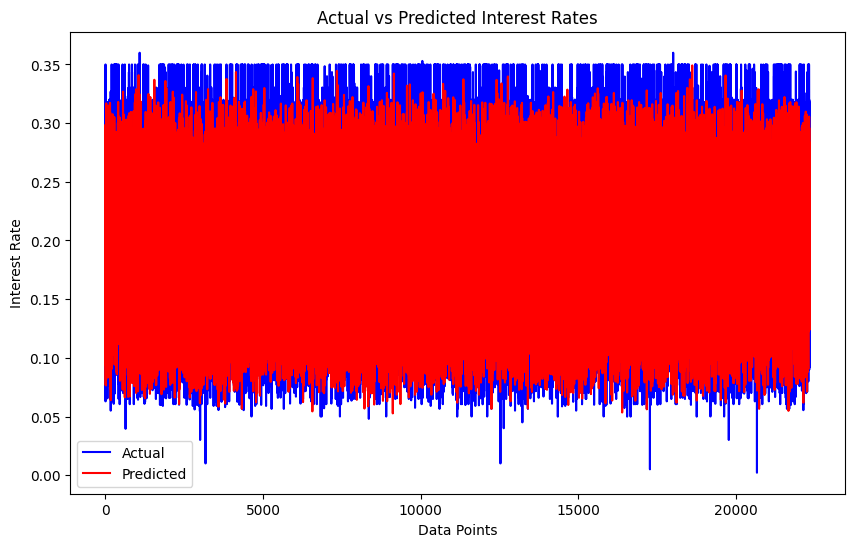

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset using pd.read_csv
prosper_data = pd.read_csv('prosperLoanData.csv')

# Select relevant features and target variable
features = ['LoanOriginalAmount', 'StatedMonthlyIncome', 'Term', 'EmploymentStatus', 'CreditScoreRangeLower', 'CreditScoreRangeUpper']
target = 'BorrowerRate'
data = prosper_data[features + [target]]

# Drop rows with missing values
data = data.dropna()

# Convert categorical variables to numerical
data = pd.get_dummies(data, columns=['Term', 'EmploymentStatus'], drop_first=True)

# Split the dataset into training and test sets
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the regressor
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
# Create a scatter plot to compare actual vs. predicted interest rates
import matplotlib.pyplot as plt

# Plot actual vs predicted interest rates
plt.figure(figsize=(10, 6))

# Plot actual interest rates
plt.plot(y_test.values, label='Actual', color='blue')

# Plot predicted interest rates
plt.plot(y_pred, label='Predicted', color='red')

plt.title('Actual vs Predicted Interest Rates')
plt.xlabel('Data Points')
plt.ylabel('Interest Rate')
plt.legend()
plt.show()

#Borrower Rate Forecasting Using ARIMA

<ipython-input-6-d614094181fb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LoanOriginationDate'] = pd.to_datetime(data['LoanOriginationDate'])


Root Mean Squared Error (RMSE): 0.03637562418247235


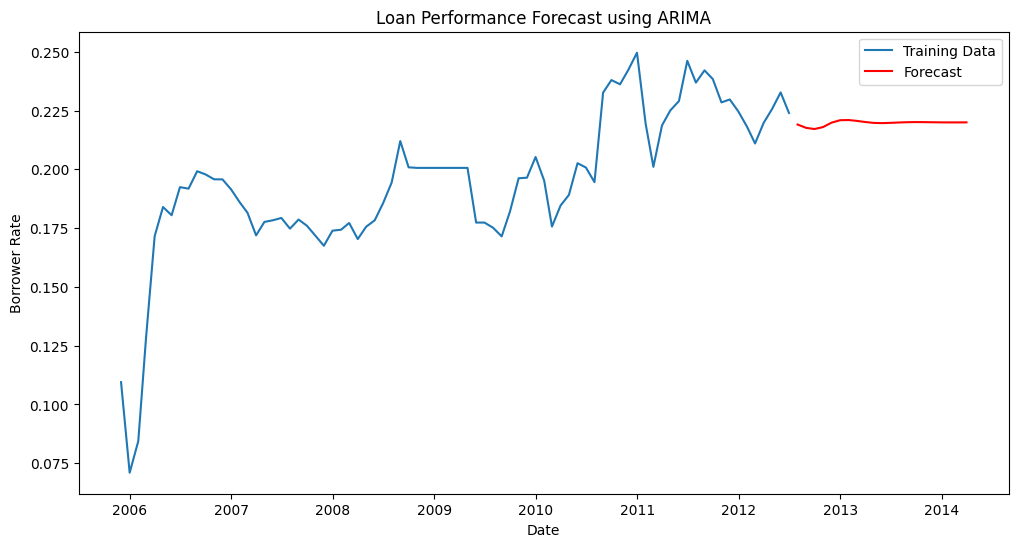

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the dataset
prosper_data = pd.read_csv('prosperLoanData.csv')

# Preprocess the data
data = prosper_data[['LoanOriginationDate', 'BorrowerRate']]
data['LoanOriginationDate'] = pd.to_datetime(data['LoanOriginationDate'])
data = data.set_index('LoanOriginationDate')

# Resample the data to monthly frequency and fill missing values
data = data.resample('M').mean().fillna(method='ffill')

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Define and fit the ARIMA model
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Loan Performance Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Borrower Rate')
plt.legend()
plt.show()
